In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
import os

from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

load_dotenv()
api_key = os.getenv("OPENAI_API_KEY")

model = ChatOpenAI(api_key=api_key, model="gpt-4o-mini")

class State(TypedDict):
    messages: Annotated[list, add_messages]


workflow = StateGraph(State)

In [2]:
from langchain_core.tools import tool
from datetime import datetime
import pytz
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper

import bs4
from langchain_community.document_loaders import WebBaseLoader

SEPARATOR = ";\n"

@tool
def get_current_time(timezone: str, location: str) -> str:
    """Get the current time for a specific timezone and location.
    
    Args:
        timezone: The timezone identifier (e.g., 'Asia/Seoul', 'America/New_York')
        location: The location name for display purposes
    
    Returns:
        A string with the current time in the specified timezone
    """
    try:
        tz = pytz.timezone(timezone)
        now = datetime.now(tz).strftime("%Y-%m-%d %H:%M:%S")
        result = f'{timezone} ({location}) time is {now}'
        return result
    except pytz.UnknownTimeZoneError:
        return f"Unknown timezone: {timezone}"

@tool
def get_web_search(query: str, search_period: str = 'm') -> str: 
    """Search the web using DuckDuckGo search engine. ß
    
    Args:
        query: The search query string
        search_period: Time period for search results ('d' for day, 'w' for week, 'm' for month, 'y' for year)
    
    Returns:
        Search results as a string separated by semicolons
    """
    wrapper = DuckDuckGoSearchAPIWrapper(
        time=search_period
    )

    print("\n----------------------- WEB SEARCH -----------------------")
    print(query)
    print(search_period)

    search = DuckDuckGoSearchResults(
        api_wrapper=wrapper,
        # source  = 'news',
        results_separator=SEPARATOR
    )

    searched = search.invoke(query)

    for i, result in enumerate(searched.split(SEPARATOR)):
        print(f"{i+1}. {result}")

    return searched

tools = [get_current_time, get_web_search]

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
tools[0].invoke({ "timezone": "Asia/Seoul", "location": "Seoul" })

'Asia/Seoul (Seoul) time is 2025-08-08 11:05:01'

In [4]:
tools[1].invoke({ "query": "AI 에이전트 디자인 패턴", "search_period": "m"})

/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:



----------------------- WEB SEARCH -----------------------
AI 에이전트 디자인 패턴
m
1. snippet: Jul 18, 2025 · AI 에이전트 아키텍처의 기본 오케스트레이션 패턴, 즉 순차, 동시, 그룹 채팅, 핸드오프 및 흡인 패턴에 대해 알아봅니다., title: AI 에이전트 오케스트레이션 패턴 - Azure Architecture Center, link: https://learn.microsoft.com/ko-kr/azure/architecture/ai-ml/guide/ai-agent-design-patterns
2. snippet: 4 days ago · 다음은 실무 현장에서 가장 널리 활용되고 있는 5가지 대표적인 AI 에이전트 디자인 패턴이다. 각각의 패턴은 실제 기업 사례와 함께 소개된다., title: [정종기의 AX㊹] 기업 경쟁력 높이는 핵심 열쇠, AI 에이전트 ..., link: http://www.hitech.co.kr/news/articleView.html?idxno=48783
3. snippet: Jul 31, 2025 · 실무 적용 예시 Customer Service Bot: 사용자 질의 → 허브가 상황 판단 → 분류 에이전트, 추천 에이전트 호출 → 응답 생성 AI RAG 시스템: 사용자 질문 → Orchestrator가 …, title: 에이전틱 AI(Agentic AI), 이렇게 만들면 됩니다: 실전 6단계 구축 ..., link: https://blog.naver.com/carrotcap/223960593047
4. snippet: Jul 15, 2025 · 이 글에서는 구글 (Google)이 제안한 AI 에이전트 아키텍처를 바탕으로, 실제 기업 환경에서 어떻게 AI 실행력을 설계할 수 있는지 구체적으로 살펴보겠습니다., title: [기술리포트] 2025 구글 AI 에이전트 아키텍처 구조 완벽 이해, link: https://tech.ktcloud.com/entry

'snippet: Jul 18, 2025 · AI 에이전트 아키텍처의 기본 오케스트레이션 패턴, 즉 순차, 동시, 그룹 채팅, 핸드오프 및 흡인 패턴에 대해 알아봅니다., title: AI 에이전트 오케스트레이션 패턴 - Azure Architecture Center, link: https://learn.microsoft.com/ko-kr/azure/architecture/ai-ml/guide/ai-agent-design-patterns;\nsnippet: 4 days ago · 다음은 실무 현장에서 가장 널리 활용되고 있는 5가지 대표적인 AI 에이전트 디자인 패턴이다. 각각의 패턴은 실제 기업 사례와 함께 소개된다., title: [정종기의 AX㊹] 기업 경쟁력 높이는 핵심 열쇠, AI 에이전트 ..., link: http://www.hitech.co.kr/news/articleView.html?idxno=48783;\nsnippet: Jul 31, 2025 · 실무 적용 예시 Customer Service Bot: 사용자 질의 → 허브가 상황 판단 → 분류 에이전트, 추천 에이전트 호출 → 응답 생성 AI RAG 시스템: 사용자 질문 → Orchestrator가 …, title: 에이전틱 AI(Agentic AI), 이렇게 만들면 됩니다: 실전 6단계 구축 ..., link: https://blog.naver.com/carrotcap/223960593047;\nsnippet: Jul 15, 2025 · 이 글에서는 구글 (Google)이 제안한 AI 에이전트 아키텍처를 바탕으로, 실제 기업 환경에서 어떻게 AI 실행력을 설계할 수 있는지 구체적으로 살펴보겠습니다., title: [기술리포트] 2025 구글 AI 에이전트 아키텍처 구조 완벽 이해, link: https://tech.ktcloud.com/entry/2025-07-google-ai-agent-architecture-시스템구조-이해'

In [5]:
for tool in tools:
    print(tool.name, tool)

get_current_time name='get_current_time' description="Get the current time for a specific timezone and location.\n\n    Args:\n        timezone: The timezone identifier (e.g., 'Asia/Seoul', 'America/New_York')\n        location: The location name for display purposes\n\n    Returns:\n        A string with the current time in the specified timezone" args_schema=<class 'langchain_core.utils.pydantic.get_current_time'> func=<function get_current_time at 0x10a46aac0>
get_web_search name='get_web_search' description="Search the web using DuckDuckGo search engine. ß\n\n    Args:\n        query: The search query string\n        search_period: Time period for search results ('d' for day, 'w' for week, 'm' for month, 'y' for year)\n\n    Returns:\n        Search results as a string separated by semicolons" args_schema=<class 'langchain_core.utils.pydantic.get_web_search'> func=<function get_web_search at 0x111207ec0>


In [6]:
model_with_tools = model.bind_tools(tools)

def generate(state: State):
    return { "messages": [model_with_tools.invoke(state["messages"])] }

workflow.add_node("generate", generate)


In [7]:
import json
from langchain_core.messages import ToolMessage

class BasicToolNode:
    def __init__(self, tools: list) -> None:
        self.tools_by_name = { tool.name: tool for tool in tools }

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No messages in inputs")

        outputs = []
        for tool_call in message.tool_calls:
            tool_name = self.tools_by_name[tool_call["name"]].invoke(tool_call["args"])
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_name),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return { "messages": messages + outputs }

tool_node = BasicToolNode(tools=tools)
workflow.add_node("tools", tool_node)

In [8]:
def route_tools(state: State):
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"tool_edge 입력 상태에서 메세지를 찾을 수 없습니다: {state}")

    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return END

workflow.add_edge(START, "generate")

workflow.add_conditional_edges(
    "generate",
    route_tools,
    { "tools": "tools", END: END}
)

workflow.add_edge("tools", "generate")

graph = workflow.compile()

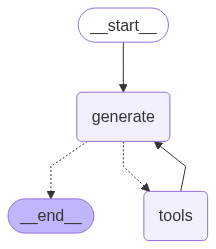

In [9]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [11]:
from langchain_core.messages import AIMessageChunk, HumanMessage

inputs = [HumanMessage(content="지금 서울 몇 시야 ?")]

gathered = None

for msg, metadata in graph.stream({ "messages": inputs }, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end="")

        if gathered is None:
            gathered = msg
        else:
            gathered = gathered + msg

gathered


현재 서울은 2025년 8월 8일 11시 11분 45초입니다.

AIMessageChunk(content='현재 서울은 2025년 8월 8일 11시 11분 45초입니다.', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'function': {'arguments': '{"timezone":"Asia/Seoul","location":"서울"}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-mini-2024-07-18gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93cfp_34a54ae93c', 'service_tier': 'defaultdefault'}, id='run--05bec7a7-e75d-4752-a169-0e40bde90cf1', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'index': 0, 'type': 'tool_call_chunk'}])

In [13]:
from langchain_core.messages import AIMessageChunk, HumanMessage, SystemMessage

about = "서울 월드컵 경기장 잔디 문제"

inputs = [
    SystemMessage(content=f"""
    너는 신문기자이다. 최근 {about}에 대해 비판하는 심층 분석 기사를 쓰려고 한다.

    - 최근 어떤 이슈가 있는지 검색하고, 사람들이 제일 관심있어 할만한 주제를 선정하고, 왜 선정했는지 말해줘.
    - 그 내용으로 원고를 작성하기 위한 목차를 만들고, 목차 내용을 채우기 위해 추가로 검색할 내용을 리스트로 정리해봐.
    - 검색할 리스트를 토대로 재검색해.
    - 목차에 있는 내용을 작성하기 위해 더 검색이 필요한 정보가 있는지 확인하고, 있다면 추가로 검색해.
    - 검색된 결과에 원하는 정보를 찾지 못했다면 다른 검색어로 재검색해도 좋아.

    더 이상 검색할 내용이 없다면, 조선일보 신문 기사 형식으로 최종 기사를 작성한다.
    제목, 부제, 리드문, 본문의 구성으로 작성한다. 본문 내용은 심층 분석 기사에 맞게 구체적으고 싶이 있게 작성해야 한다.
    """)
]

for msg, metadata in graph.stream({ "messages": inputs }, stream_mode="messages"):
    if isinstance(msg, AIMessageChunk):
        print(msg.content, end="")

gathered


----------------------- WEB SEARCH -----------------------
서울 월드컵 경기장 잔디 문제
w


/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


1. snippet: 6 days ago · 동아시안컵 혹사 논란: 동아시안컵 여자부 경기를 수원 월드컵 경기장에서 개최하면서 문제가 시작되었습니다. 7월 9일부터 16일까지 단 일주일 만에 무려 5경기를 몰아치듯 진행했습니다. 축구장 잔디는 경기를 치른 후 일정 기간의 …, title: 뉴캐슬전 잔디 대참사, 11억 들인 수원 경기장 잔디가 망가진 ..., link: https://koreaamateursports.tistory.com/entry/뉴캐슬전-잔디-대참사-11억-들인-수원-경기장-잔디가-망가진-충격적-이유
2. snippet: 5 days ago · 월드컵 구장 잔디는 개선이 된건가요? 2025-08-03 20:27:41 106.♡.64.53 산들바람12 연초까지도 문제 많아 보이던데 지금은 상탸가 좋아 보이네요 신경을 써서 그런지 뛰는데 문제는 없어 보이네요., title: 월드컵 구장 잔디는 개선이 된건가요? - 클리앙, link: https://www.clien.net/service/board/park/19037277
3. snippet: 5 days ago · 특히 채 의원은 광주월드컵경기장 잔디 문제를 질타했다. 채 의원이 “초유의 사태에 대해 구단주로서 어떻게 생각하느냐”고 묻자, 강 시장은 “개인적으로 매우 안타깝고 구단주로서 팬들에게 정말 미안하다”고 공식 사과했다., title: 월드컵경기장 잔디 문제 질타…姜시장 공식 사과 - 광주매일신문, link: http://www.kjdaily.com/1729081047642187000
4. snippet: 2 days ago · 서울월드컵경기장은 많은 이들이 모여 스포츠의 열기를 느끼는 특별한 장소입니다. 하지만 경기장 내 안전과 질서를 위해 반입금지물품에 대한 단속이 엄격히 이루어지고 있습니다. 최근에는 이러한 단속이 더욱 강화되면서 …, title: 서울월드컵경기장 반입금지물품 단속, 꼭 알아야 할 사항들, link: https://2.sinsa.net/서울월드컵경기장-반입금지물품-

/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


1. snippet: Oct 16, 2024 · 동행·매력 특별시 서울의 주요뉴스, 시민참여, 주요서비스, 자주찾은서비스, 시장실, 분야별정보, 새소식등의 정보제공, title: 서울특별시 - 동행·매력 특별시 서울, link: http://seoul.go.kr/
2. snippet: 서울 은 (는) 여기로 연결됩니다. 다른 뜻에 대한 내용은 서울 (동음이의어) 문서를 참고하십시오. 대한민국광역자치단체 특별시 서울특별시 광역시 부산광역시 대구광역시 인천광역시 광주광역시 대전광역시 울산광역시 특별자치시 세종특별자치시 도 경기도 ..., title: 서울특별시 - 나무위키, link: https://namu.wiki/w/서울특별시
3. snippet: 서울 한양도성 조선시대 수도 한양을 둘러싸던 성곽으로, 도심 속에서 역사와 자연을 함께 느낄 수 있는 산책 명소 186 reviews, title: 서울 가볼만한 관광 명소 | 서울 공식 관광정보 웹사이트 - Seoul, link: https://korean.visitseoul.net/attractions
4. snippet: Jul 20, 2025 · 서울특별시 (서울特別市, 영어: Seoul Metropolitan City)는 사실상 대한민국 의 수도 이자 문화·인문·정치·경제 중심지 역할을 하는 도시로, 경기도 와 인천광역시 까지 아우르는 수도권 의 중심지 기능을 하고 있다., title: 서울특별시 - 위키백과, 우리 모두의 백과사전, link: https://ko.wikipedia.org/wiki/서울특별시

----------------------- WEB SEARCH -----------------------
스포츠 의학 전문가 잔디 문제 서울 월드컵 경기장
m


/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


1. snippet: Jul 31, 2025 · 수원월드컵경기장의 잔디 논란은 이번이 처음이 아니다. 수원 삼성은 지난 27일 K리그2 서울 이랜드와 홈경기에서 0-2 패배의 쓴맛을 봤다. 경기 결과도 결과지만, 중계 화면에 잡힌 그라운드 상태가 충격이었다. 잔디 곳곳이 …, title: 한숨만 나오는 '빅버드 잔디"… "회복 불가능한 수준" - 세계일보, link: https://www.segye.com/newsView/20250731507295
2. snippet: Jul 31, 2025 · 수원월드컵경기장은 지난 3월, 재개장을 앞두고 서울월드컵경기장의 상태가 좋지 않다는 이유로 요르단과의 3차 예선 홈경기를 개최했다. 이에 따라 수원은 서울 이랜드와의 코리아컵 2라운드 경기를 앞당겨서 치러야만 하는 …, title: 팀 K리그, 뉴캐슬에 1-0 승리... 또 불거진 수원월드컵경기장 잔디 ..., link: https://star.ohmynews.com/NWS_Web/OhmyStar/at_pg.aspx?CNTN_CD=A0003152984
3. snippet: Jul 31, 2025 · 경기장 곳곳에서 파인 잔디와 색이 변한 모습이 포착됐다. 수원월드컵경기장은 지난해 7월 그라운드 보수 공사를 진행한 이후 지난 3월부터 K리그2 소속 수원삼성 블루윙즈가 사용해왔다. 4개월 만에 잔디가 엉망이 된 셈이다., title: 선수도 "잔디 최악" 또 논란…4개월 만에 엉망 된 '빅버드', link: https://news.mt.co.kr/mtview.php?no=2025073108430354954
4. snippet: Jul 31, 2025 · 수원월드컵경기장은 지난해 잔디 교체 공사를 진행했지만 최근 무더위와 잦은 경기로 인해 상태가 급격히 악화된 것으로 보인다., title: 손님 불러놓고…팀 K리그 vs 뉴캐슬전 잔디 논란 - 이투데이, link: https://www.etoday.co.kr/news/view/2492809

------------------

/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/Users/tkhwang/Documents/git/_tkhwang/tkhwang-book-lecture-coding/ai/book-do-it-ai-agent/.venv/lib/python3.11/site-packages/langchain_community/utilities/duckduckgo_search.py:63: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:


1. snippet: Jul 30, 2025 · 여름철 기록적인 폭우와 폭염에 더해, 잇따른 외부 경기 유치로 잔디 생육 환경이 악화했기 때문이다. 수원월드컵경기장관리재단은 2024시즌 후반기를 앞두고 약 11억 원을 …, title: 축제 앞두고 들끓는 우려… 경기 쉴 새 없는 수원월드컵경기장 ..., link: https://www.hansbiz.co.kr/news/articleView.html?idxno=765349
2. snippet: Jul 29, 2025 · 수원월드컵경기장은 지난 3월 2026 북중미 월드컵 아시아지역 3차예선을 치렀다. 당시 서울월드컵경기장의 잔디 상태가 좋지 않아 고양과 수원이 A매치 대체장소로 결정됐다., title: 혹서에 혹사에… 수원월드컵경기장, 11억 들인 잔디도 훼손 심각, link: https://www.kyeongin.com/article/1747682
3. snippet: Jul 31, 2025 · 수원월드컵경기장은 지난 3월, 재개장을 앞두고 서울월드컵경기장의 상태가 좋지 않다는 이유로 요르단과의 3차 예선 홈경기를 개최했다. 이에 따라 수원은 서울 이랜드와의 …, title: 팀 K리그, 뉴캐슬에 1-0 승리... 또 불거진 수원월드컵경기장 잔디 ..., link: https://star.ohmynews.com/NWS_Web/OhmyStar/at_pg.aspx?CNTN_CD=A0003152984
4. snippet: Jul 29, 2025 · 네이버 MY구독 에서 편하게 받아보세요., title: 수원월드컵경기장 잔디 회복 불가능 판정... : 네이버 블로그, link: https://blog.naver.com/dmb1125/223951053331
추가 검색을 통해 얻은 정보들에 따라 심층 분석 기사의 내용을 다음과 같이 작성해 보겠습니다.

### 최종 기사

#### 제목: 서울 월드컵 경기장, 잔디 문제로 경기력 저하 우려

#### 부제: 잔디 상태 악화, 선수와 관중의 안전을 위협하다

#### 리드

AIMessageChunk(content='현재 서울은 2025년 8월 8일 11시 11분 45초입니다.', additional_kwargs={'tool_calls': [{'index': 0, 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'function': {'arguments': '{"timezone":"Asia/Seoul","location":"서울"}', 'name': 'get_current_time'}, 'type': 'function'}]}, response_metadata={'finish_reason': 'tool_callsstop', 'model_name': 'gpt-4o-mini-2024-07-18gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_34a54ae93cfp_34a54ae93c', 'service_tier': 'defaultdefault'}, id='run--05bec7a7-e75d-4752-a169-0e40bde90cf1', tool_calls=[{'name': 'get_current_time', 'args': {'timezone': 'Asia/Seoul', 'location': '서울'}, 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'type': 'tool_call'}], tool_call_chunks=[{'name': 'get_current_time', 'args': '{"timezone":"Asia/Seoul","location":"서울"}', 'id': 'call_vRbSjYXiHWQlBt7fuqfKzdv9', 'index': 0, 'type': 'tool_call_chunk'}])